#ML Course Regression Assignment: Predicting Housing Prices

# **House Prices - Homework 3**

@Yevheniia-Rudenko

09/04/2025

***

## Dataset: Boston Housing Prices

In this assignment, you will explore a dataset of housing prices and use regression to predict house prices based on various features. You will also perform exploratory data analysis (EDA), visualize the data, and select important features.

### Instructions:
- Answer the following questions by writing code in the cells below.
- Be sure to visualize your findings and explain your reasoning.
- Finally, train a regression model to predict housing prices and evaluate its performance.

---


In [1]:
# Import necessary libraries for data manipulation, visualization, and modeling

import pandas as pd  # For handling and manipulating tabular data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For more advanced and visually appealing plots (built on matplotlib)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error




## **1. Data Loading and Exploration**

### Question 1: Load the dataset and inspect the first few rows.
- Load the Boston housing dataset (from `sklearn.datasets`) into a pandas DataFrame.
Since the **Boston Housing dataset** is deprecated, you can download the alternative housing dataset from [Kaggle Housing Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) if necessary.

- Display the first 5 rows to understand the structure of the data.

### Question 2: Check for missing values.
- Identify if there are any missing values in the dataset. How would you handle them if any exist?

---


In [2]:
# Load the training and test datasets from CSV files

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#display first 5 rows
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#check for missing values
missing_values = train.isnull().sum()

#Display column with missing value
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [4]:
# Create a copy of the original DataFrame to avoid modifying the original one
linear_train = train.copy()

In [5]:
# Drop columns where more than 30% of the data is missing
linear_train.dropna(thresh=train.shape[0] * 0.7, axis=1, inplace=True)


In [6]:
# Fill missing values in numerical columns with the median
for col in ["LotFrontage", "MasVnrArea", "GarageYrBlt"]:
    linear_train[col] = linear_train[col].fillna(linear_train[col].median())

# Fill missing values in categorical columns with a relevant category
basement_cols = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in basement_cols:
    linear_train[col] = linear_train[col].fillna("No Basement")

garage_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for col in garage_cols:
    linear_train[col] = linear_train[col].fillna("No Garage")


# Fill missing values in Electrical column with mode
linear_train["Electrical"] = linear_train["Electrical"].fillna(linear_train["Electrical"].mode()[0])



In [7]:
# Check for remaining missing values
print(linear_train.isnull().sum().sort_values(ascending=False).head())

Id              0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
dtype: int64


Text(0.5, 1.0, 'Boxplot for GrLivArea')

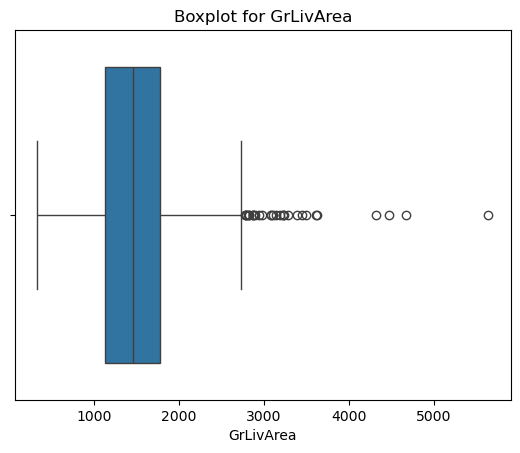

In [8]:
# Visualizing outliers for "GrLivArea" using a boxplot
# This helps identify extreme values that might need to be removed or analyzed further
sns.boxplot(x=linear_train["GrLivArea"])
plt.title("Boxplot for GrLivArea")

In [9]:
# Calculating the Interquartile Range (IQR) for the "GrLivArea" column to detect outliers
# Q1 is the 25th percentile, Q3 is the 75th percentile, and IQR is the difference between them
# Rows with "GrLivArea" values outside of the acceptable range (1.5 * IQR above Q3 or below Q1) are considered outliers and are removed
Q1 = linear_train["GrLivArea"].quantile(0.25)
Q3 = linear_train["GrLivArea"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

linear_train = linear_train[(linear_train["GrLivArea"] >= lower_bound) & (linear_train["GrLivArea"] <= upper_bound)]

Text(0.5, 1.0, 'Boxplot for GrLivArea')

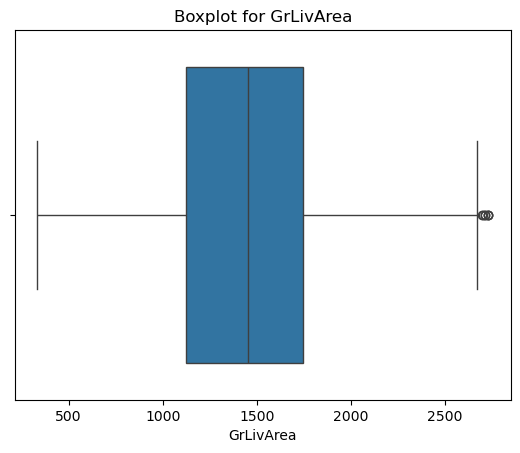

In [10]:
sns.boxplot(x=linear_train["GrLivArea"])
plt.title("Boxplot for GrLivArea")


## **2. Exploratory Data Analysis (EDA)**

### Question 3: Describe the dataset's numerical features.
- Use `describe()` to get a summary of the dataset's numerical columns.
- Which feature(s) have the highest and lowest values? Are there any surprising observations?

### Question 4: Visualize the distribution of house prices.
- Create a histogram of the house prices. Is the distribution normal or skewed?

### Question 5: Explore relationships between features and house prices.
- Create scatter plots for at least 3 features vs. house prices (target variable).
- What relationships do you observe between the selected features and the target?

---


In [11]:
# Calculate correlation matrix using only numeric columns
numeric_data = linear_train.select_dtypes(include=['int64', 'float64'])  # Exclude non-numeric columns
correlation_matrix = numeric_data.corr()

# Display correlations of all features with 'SalePrice'
saleprice_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(saleprice_correlation)

SalePrice        1.000000
OverallQual      0.804186
GrLivArea        0.696162
GarageCars       0.654766
TotalBsmtSF      0.648681
GarageArea       0.638838
1stFlrSF         0.615310
YearBuilt        0.580922
YearRemodAdd     0.537274
FullBath         0.528040
GarageYrBlt      0.496169
TotRmsAbvGrd     0.495099
Fireplaces       0.465247
MasVnrArea       0.442265
BsmtFinSF1       0.416804
LotFrontage      0.334599
OpenPorchSF      0.330455
WoodDeckSF       0.315334
HalfBath         0.270953
BsmtFullBath     0.255452
LotArea          0.253177
2ndFlrSF         0.232434
BsmtUnfSF        0.194103
BedroomAbvGr     0.114485
ScreenPorch      0.087613
MoSold           0.072608
3SsnPorch        0.057198
PoolArea         0.023510
BsmtFinSF2      -0.001651
YrSold          -0.022127
MiscVal         -0.023472
BsmtHalfBath    -0.030864
Id              -0.036630
LowQualFinSF    -0.080934
OverallCond     -0.097212
MSSubClass      -0.098603
KitchenAbvGr    -0.142548
EnclosedPorch   -0.158414
Name: SalePr

In [12]:
# Identify the top 3 features most correlated with 'SalePrice'
top_features = saleprice_correlation.index[1:4]  # Exclude 'SalePrice' itself
print(f"Top features most correlated with SalePrice: {list(top_features)}")

Top features most correlated with SalePrice: ['OverallQual', 'GrLivArea', 'GarageCars']


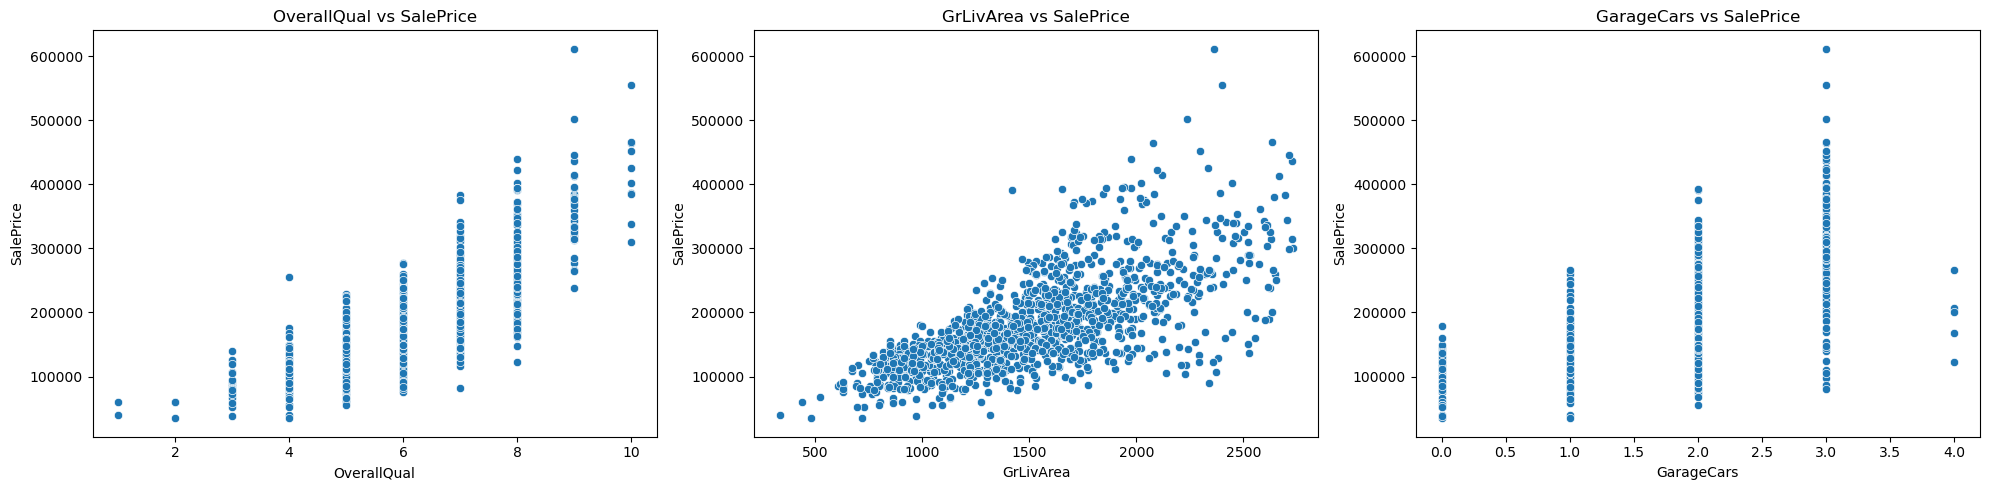

In [13]:

# Scatter plots for these features against SalePrice
plt.figure(figsize=(20, 5))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=linear_train, x=feature, y='SalePrice')
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()



## **4. Regression Modeling**

### Question 7: Split the dataset
- Split the dataset into training and testing sets. Use an 80/20 split.
- Make sure to separate the target variable (house prices) from the features.

### Question 8: Train a Linear Regression Model
- Train a Linear Regression model using the training data.
- Evaluate the model's performance on the test data by calculating the Mean Squared Error (MSE).

### Question 9: Feature Importance (Optional)
- If using a model like Ridge or Lasso, identify which features are most important in predicting house prices.

---


In [14]:
# Prepare data for modeling
X = linear_train.drop(columns=['SalePrice', 'Id'])  # Features
y = linear_train['SalePrice']  # Target

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# Evaluate Linear Regression
linear_mse = mean_squared_error(y_test, linear_pred)
linear_rmse = np.sqrt(linear_mse)

print(f"Linear Regression MSE: {linear_mse:.2f}")
print(f"Linear Regression RMSE: {linear_rmse:.2f}")


Linear Regression MSE: 424295577.91
Linear Regression RMSE: 20598.44


In [15]:
# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Evaluate Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)

print(f"Ridge Regression MSE: {ridge_mse:.2f}")
print(f"Ridge Regression RMSE: {ridge_rmse:.2f}")

Ridge Regression MSE: 422979445.93
Ridge Regression RMSE: 20566.46


In [16]:
# Train Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Evaluate Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)

print(f"Lasso Regression MSE: {lasso_mse:.2f}")
print(f"Lasso Regression RMSE: {lasso_rmse:.2f}")

Lasso Regression MSE: 424060104.52
Lasso Regression RMSE: 20592.72


/Users/yevrud/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.114e+11, tolerance: 5.891e+08
  model = cd_fast.enet_coordinate_descent(


### Ridge and Lasso Regressions (with Alpha)


In [17]:

# Ridge Regression
best_ridge_alpha = 100  
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)

print(f"Ridge Regression MSE: {ridge_mse:.2f}")
print(f"Ridge Regression RMSE: {ridge_rmse:.2f}")
print(f"Alpha: {best_ridge_alpha}")

# a:0.001| MSE:424293618.77 | RMSE:20598.39
# a:0.01| MSE:424276079.97 | RMSE:20597.96
# a:0.1| MSE:424109416.62 | RMSE:20593.92
# a:1| MSE:422979445.93 | RMSE:20566.46
# a:10| MSE:417944199.73 | RMSE:20443.68
# a:100| MSE:393986278.69 | RMSE:19849.09

Ridge Regression MSE: 393986278.69
Ridge Regression RMSE: 19849.09
Alpha: 100


In [18]:
# Lasso Regression
best_lasso_alpha = 100  # Start with an initial alpha
lasso_model = Lasso(alpha=best_lasso_alpha, max_iter=10000)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
print(f"Lasso Regression MSE: {lasso_mse:.2f}")
print(f"Lasso Regression RMSE: {lasso_rmse:.2f}")
print(f"Alpha: {best_lasso_alpha}")

# a:0.001| MSE:424192848.92 | RMSE:20595.94
# a:0.01| MSE:424226661.35 | RMSE:20596.76
# a:0.1| MSE:424275892.503 | RMSE:20597.96
# a:1| MSE:423427589.74 | RMSE:20577.36
# a:10| MSE:417350524.57 | RMSE:20429.16
# a:100| MSE:384918301.15 | RMSE:19619.33

Lasso Regression MSE: 384918301.15
Lasso Regression RMSE: 19619.33
Alpha: 100



## **5. Conclusion**
- Summarize your findings and observations.
- Reflect on the regression model's performance and whether there are any improvements you would recommend.

### Conclusion
>The analysis evaluates housing price predictions using linear regression, Lasso regression and Ridge regression. 
The analysis demonstrates that proper regularization can significantly improve model performance by mitigating overfitting. The presented approach is valid and provides meaningful insights into the relationship between model parameters and predictive accuracy.

> Ridge and Lasso perform better than standard Linear Regression, especially as the value of alpha increases. This suggests that your model benefits from regularization — likely due to multicollinearity among features or some degree of overfitting.
Lasso Regression with alpha=100 achieved the lowest error (RMSE = 19,619), making it the best-performing model among the three based on the current metrics.